#### Week 9 Exercise 9.2 Author: Rex Gayas Course & Section: DSC320-T301 Math for Data Science (2243-1) Date: 11 February 2024

##### Finding the Eigenvalues and Eigenvectors of a Matrix

In [14]:
# Solution to 1(a)
import numpy as np

# Define the matrix A
A = np.array([[4, 0, 1],
              [-1, -6, -2],
              [5, 0, 0]])

# Define the vector v
v = np.array([1, 2, 3])

# Calculate the dot product of A and v
Av = np.dot(A, v)

# Display result
print("A * v =", Av)


A * v = [  7 -19   5]


The result A * v = [7, -19, 5] shows that the output is not a scalar multiple of the input vector [1, 2, 3]. Therefore, [1, 2, 3] is not an eigenvector of matrix A, since an eigenvector must satisfy the equation Av = λv, where A is the matrix, v is the eigenvector, and λ is a scalar or the eigenvalue.

In [15]:
# Solution to 1(b)
# Define the vector of 1b.
v2 = np.array([0, 1, 0])

# Calculate the dot product of A and v2
Av2 = np.dot(A, v2)

# Display result
print("A * v2 =", Av2)


A * v2 = [ 0 -6  0]


The result A * v2 = [0, -6, 0] is a scalar multiple of the input vector [0, 1, 0], with the scalar being -6. Multiplying matrix A by the vector [0, 1, 0] results in a vector that is -6 times the original vector, fulfilling the condition for an eigenvector where Av = λv. Hence, [0, 1, 0] is an eigenvector of the matrix A, and -6 is its corresponding eigenvalue.

In [16]:
# Solution to 1(c)
import numpy as np

# Define matrix A
A = np.array([[4, 0, 1],
              [-1, -6, -2],
              [5, 0, 0]])

# Calculate eigenvalues and eigenvectors via Numpy
eigenvalues, eigenvectors = np.linalg.eig(A)

# Display the results
print("Eigenvalues of A:", eigenvalues)
print("Eigenvectors of A:\n", eigenvectors)


Eigenvalues of A: [-6.  5. -1.]
Eigenvectors of A:
 [[ 0.          0.69431384 -0.18493168]
 [ 1.         -0.18935832 -0.33287702]
 [ 0.          0.69431384  0.9246584 ]]


##### Principal Component Analysis

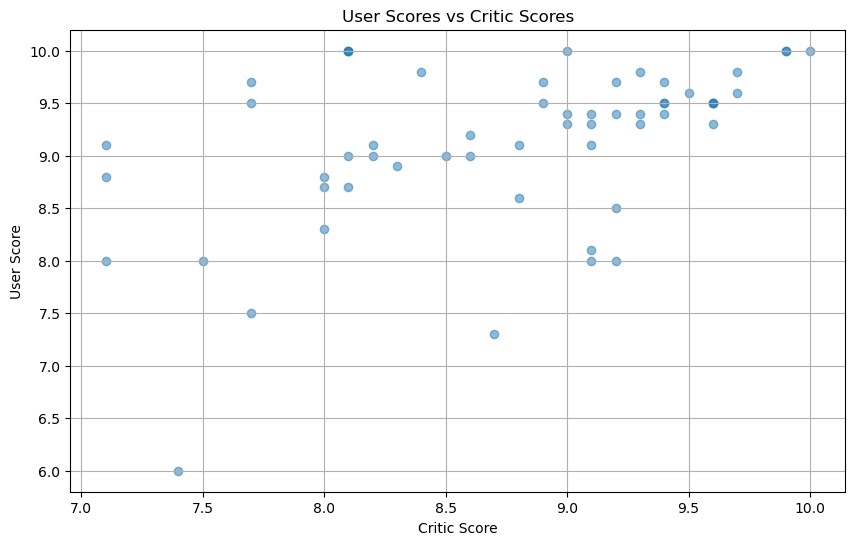

In [18]:
# Solution to 2(a)
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("D:/ALPHA/Dynamic Folder/Bellevue/Winter 2023/Math for Data Science/Week 9/week9data/week9data/video_game_data.csv")

# Plot the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['critic_score'], df['user_score'], alpha=0.5)
plt.title('User Scores vs Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.grid(True)
plt.show()

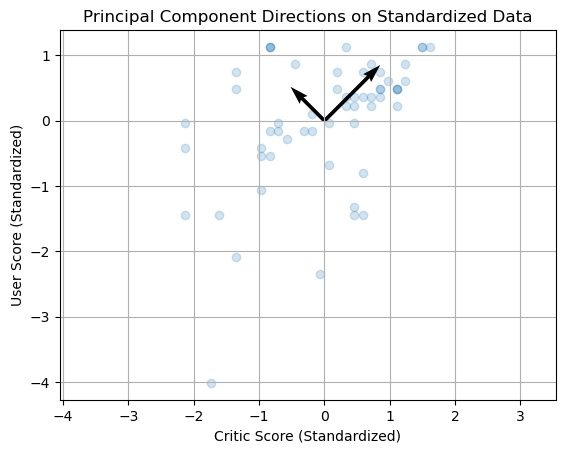

In [19]:
# Solution to 2(b)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reference numeric columns for critic_score and user_score
numeric_df = df[['critic_score', 'user_score']].dropna()

# Standardize the data
X_std = (numeric_df - numeric_df.mean()) / numeric_df.std()

# Calculate covariance matrix
cov_matrix = np.cov(X_std.T)

# Calculate Eigendecomposition
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

# Plot the original scatter plot
plt.scatter(X_std['critic_score'], X_std['user_score'], alpha=0.2)

# Plot the principal components and scale by the square root of eigenvalues
for i in range(len(eigen_vals)):
    # Eigenvector start point is the mean of the data
    start, vec = X_std.mean(), eigen_vecs[:, i]
    plt.quiver(*start, *(vec * np.sqrt(eigen_vals[i])), scale=1, scale_units='xy', angles='xy')

plt.axis('equal')
plt.xlabel('Critic Score (Standardized)')
plt.ylabel('User Score (Standardized)')
plt.title('Principal Component Directions on Standardized Data')
plt.grid(True)
plt.show()
